In [1]:
import time
#from pylab import *
import matplotlib.gridspec as gridspec
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.model_selection import train_test_split

In [2]:
import time
from pylab import *
import matplotlib.gridspec as gridspec
import numpy as np
#construct background states, observations with error

def x_to_y(X): # averaging in 2*2 windows (4 pixels)
    dim = X.shape[0]
    dim = 20
    Y = np.zeros((int(dim/2),int(dim/2)))
    for i in range(int(dim/2)):
        for j in range(int(dim/2)):
            Y[i,j] = X[2*i,2*j] + X[2*i+1,2*j] + X[2*i,2*j+1] + X[2*i+1,2*j+1]

            Y_noise = np.random.multivariate_normal(np.zeros(100),0.0000 * np.eye(100))
            Y_noise.shape = (10,10)
            Y = Y + Y_noise
    return Y


class shallow(object):


    time = 0

    plt = []
    fig = []


    def __init__(self, x=[],y=[],h_ini = 1.,u=[],v = [],dx=0.01,dt=0.0001, N=64,L=1., px=16, py=16, R=64, Hp=0.1, g=1., b=0.): # How define no default argument before?


        # add a perturbation in pressure surface


        self.px, self.py = px, py
        self.R = R
        self.Hp = Hp



        # Physical parameters

        self.g = g
        self.b = b
        self.L=L
        self.N=N

        # limits for h,u,v


        #self.dx =  self.L / self.N # a changer
        #self.dt = self.dx / 100.
        self.dx=dx
        self.dt=dt

        self.x,self.y = mgrid[:self.N,:self.N]

        self.u=zeros((self.N,self.N))
        self.v=zeros((self.N,self.N))

        self.h_ini=h_ini

        self.h=self.h_ini * ones((self.N,self.N))

        rr = (self.x-px)**2 + (self.y-py)**2
        self.h[rr<R] = self.h_ini + Hp #set initial conditions

        self.lims = [(self.h_ini-self.Hp,self.h_ini+self.Hp),(-0.02,0.02),(-0.02,0.02)]



    def dxy(self, A, axis=0):
        """
        Compute derivative of array A using balanced finite differences
        Axis specifies direction of spatial derivative (d/dx or d/dy)
        dA[i]/dx =  (A[i+1] - A[i-1] )  / 2dx
        """
        return (roll(A, -1, axis) - roll(A, 1, axis)) / (self.dx*2.) # roll: shift the array axis=0 shift the horizontal axis

    def d_dx(self, A):
        return self.dxy(A,1)

    def d_dy(self, A):
        return self.dxy(A,0)


    def d_dt(self, h, u, v):
        """
        http://en.wikipedia.org/wiki/Shallow_water_equations#Non-conservative_form
        """
        for x in [h, u, v]: # type check
           assert isinstance(x, ndarray) and not isinstance(x, matrix)

        g,b,dx = self.g, self.b, self.dx

        du_dt = -g*self.d_dx(h) - b*u
        dv_dt = -g*self.d_dy(h) - b*v

        H = 0 #h.mean() - our definition of h includes this term
        dh_dt = -self.d_dx(u * (H+h)) - self.d_dy(v * (H+h))

        return dh_dt, du_dt, dv_dt


    def evolve(self):
        """
        Evolve state (h, u, v) forward in time using simple Euler method
        x_{N+1} = x_{N} +   dx/dt * d_t
        """

        dh_dt, du_dt, dv_dt = self.d_dt(self.h, self.u, self.v)
        dt = self.dt

        self.h += dh_dt * dt
        self.u += du_dt * dt
        self.v += dv_dt * dt
        self.time += dt

        return self.h, self.u, self.v





time 0.000100


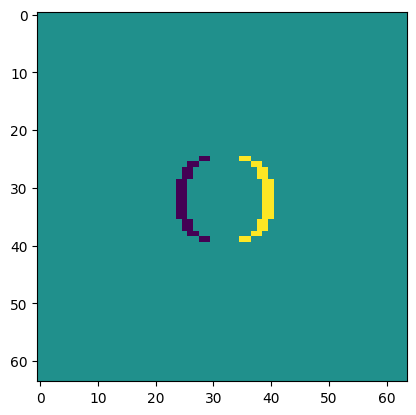

0
time 0.005100


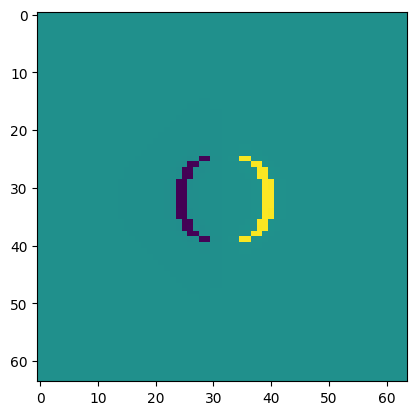

1
time 0.010100


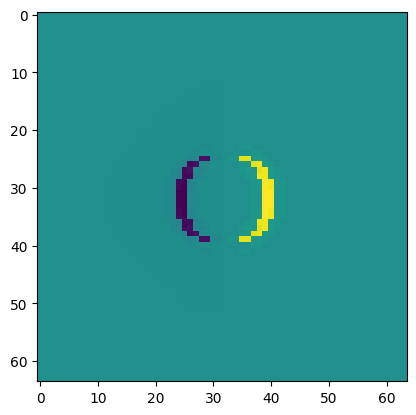

2
time 0.015100


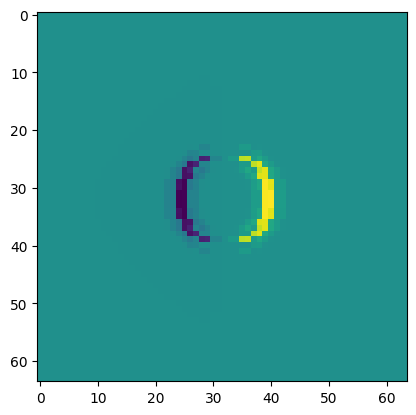

3
time 0.020100


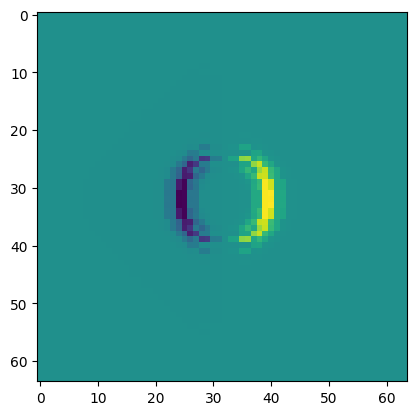

4
time 0.025100


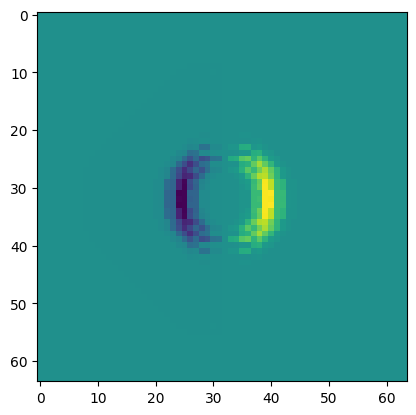

5
time 0.030100


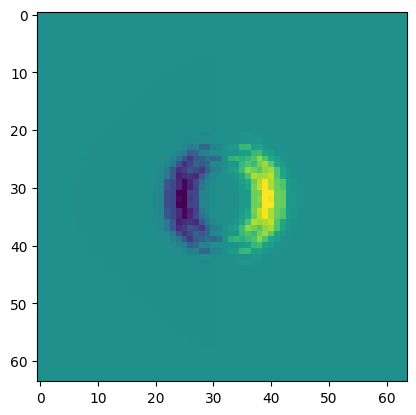

6
time 0.035100


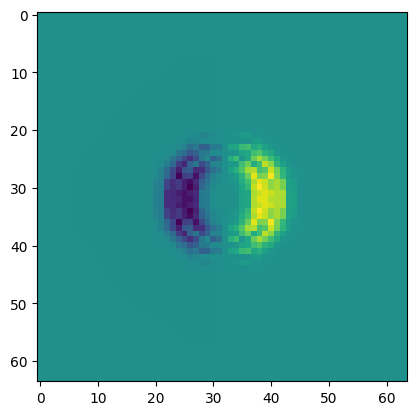

7
time 0.040100


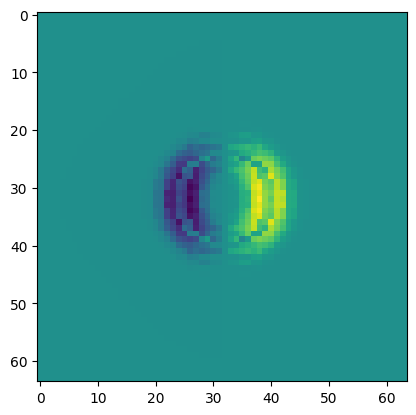

8
time 0.045100


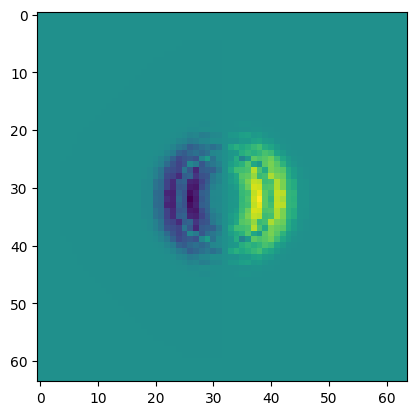

9
time 0.050100


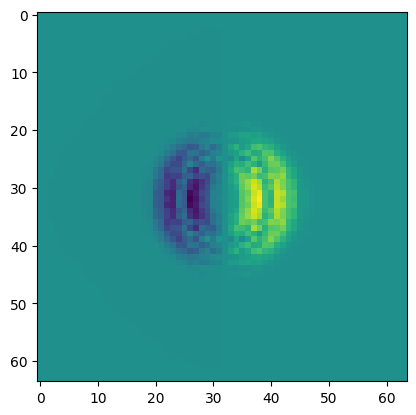

10
time 0.055100


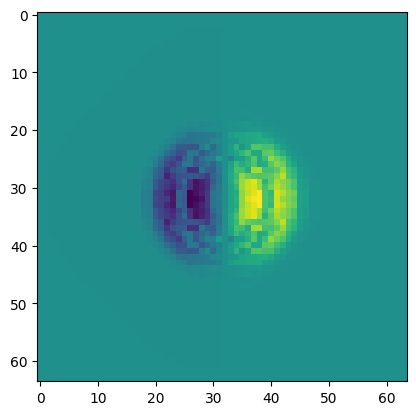

11
time 0.060100


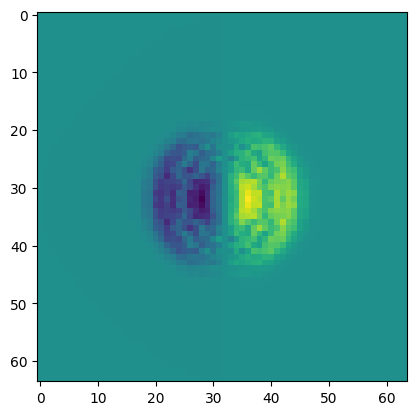

12
time 0.065100


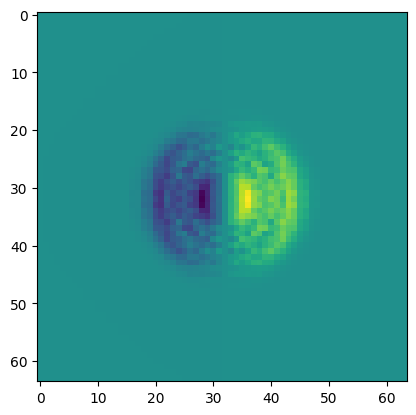

13
time 0.070100


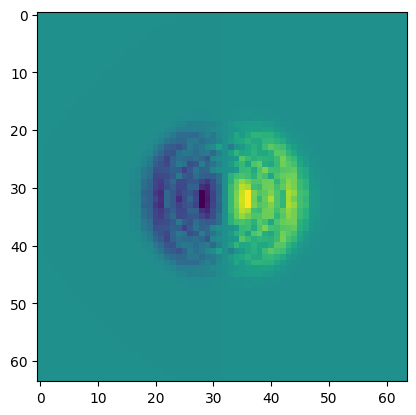

14
time 0.075100


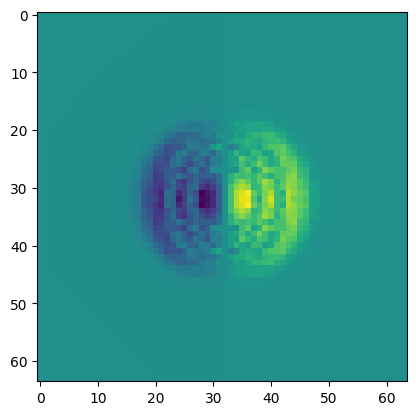

15
time 0.080100


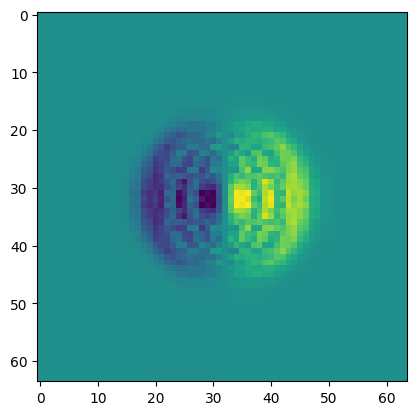

16
time 0.085100


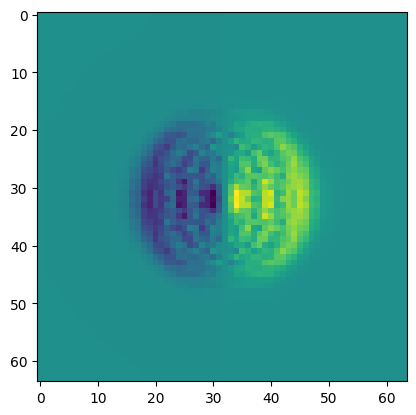

17
time 0.090100


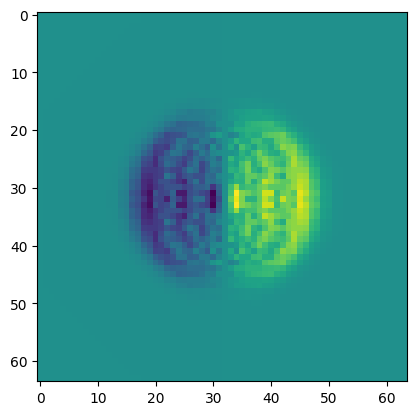

18
time 0.095100


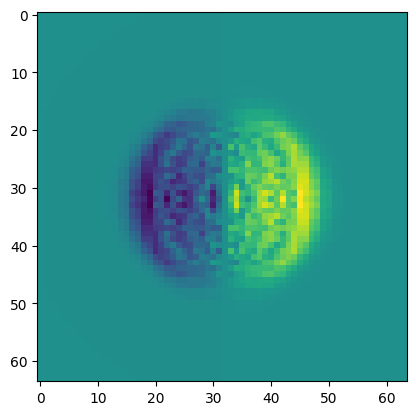

19


<Figure size 640x480 with 0 Axes>

In [3]:
iteration_times= 1000

SW = shallow(N=64,px=32,py=32,R=64.,Hp=0.1,b=0.2)
# chose a point (x,y) to check the evolution
x=10
y=10

#true_u_vect = np.zeros((160,64,64))

#vor_u_vect = np.zeros((160,64,64))

index = 0

#SW.plot()
u_vect=np.zeros(iteration_times)
v_vect=np.zeros(iteration_times)
h_vect=np.zeros(iteration_times)
for i in range(iteration_times):
    SW.evolve()
    u_vect[i]=SW.u[x][y]
    v_vect[i]=SW.v[x][y]
    h_vect[i]=SW.h[x][y]
    #SW.animate()
    if i % 50 == 0:
        print ('time %f'%SW.time)
        plt.imshow(SW.u)
        plt.show()
        plt.close()
        print(index)
        #true_u_vect[index,:,:] = SW.u
        index += 1

gs = gridspec.GridSpec(2, 2,
                width_ratios=[1, 1],
                height_ratios=[1, 1]
                )

fig = plt.figure()

#fig = plt.figure()
t=SW.time




u_t = SW.u
v_t = SW.v


Running 10,000 simulations and saving as npz files with shape (64, 64, 3)

In [53]:
print(SW.u.shape)

(64, 64)


In [24]:
import random
import os
import cv2
import numpy as np

def run_and_save_simulation(px, py, R, Hp, b, num_iterations, sim):
    SW = shallow(N=64, px=px, py=py, R=R, Hp=Hp, b=b)
    
    # Video settings
    video_filename = f"CFD_VIDEOS/sim_{sim}.mp4"
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify MP4 codec
    fps = 10  # Frames per second
    frame_size = (64, 64)
    out = cv2.VideoWriter(video_filename, fourcc, fps, frame_size, isColor=True)  # Ensure isColor=True for RGB
    
    for i in range(num_iterations):
        SW.evolve()
        if i % 20 == 0:
            u_frame = SW.u  # Get the u dimension
            u_normalized = cv2.normalize(u_frame, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
            u_resized = cv2.resize(u_normalized, frame_size)
            
            # Convert single channel to 3-channel RGB
            u_resized_rgb = cv2.cvtColor(u_resized, cv2.COLOR_GRAY2RGB)
            
            out.write(u_resized_rgb)  # Write the RGB frame
    
    out.release()
    print(f"Video saved as {video_filename}")

num_simulations = 100
iteration_times = 1000
sim = 0
os.makedirs('FIELDS', exist_ok=True)

#save the parameters as well as the frames, know which simulation is for which parameters
#autoencoder and at the same time classifier to improve the cae
for _ in range(num_simulations):
    px = random.randint(27, 37) * 1.0
    py = random.randint(27, 37) * 1.0
    R = random.randint(40, 80) * 1.0
    Hp = random.randint(5, 20) * 0.01
    b = random.randint(1, 100) * 0.1

    run_and_save_simulation(px, py, R, Hp, b, iteration_times, sim)
    sim += 1


Video saved as CFD_VIDEOS/sim_0.mp4
Video saved as CFD_VIDEOS/sim_1.mp4
Video saved as CFD_VIDEOS/sim_2.mp4
Video saved as CFD_VIDEOS/sim_3.mp4
Video saved as CFD_VIDEOS/sim_4.mp4
Video saved as CFD_VIDEOS/sim_5.mp4
Video saved as CFD_VIDEOS/sim_6.mp4
Video saved as CFD_VIDEOS/sim_7.mp4
Video saved as CFD_VIDEOS/sim_8.mp4
Video saved as CFD_VIDEOS/sim_9.mp4
Video saved as CFD_VIDEOS/sim_10.mp4
Video saved as CFD_VIDEOS/sim_11.mp4
Video saved as CFD_VIDEOS/sim_12.mp4
Video saved as CFD_VIDEOS/sim_13.mp4
Video saved as CFD_VIDEOS/sim_14.mp4
Video saved as CFD_VIDEOS/sim_15.mp4
Video saved as CFD_VIDEOS/sim_16.mp4
Video saved as CFD_VIDEOS/sim_17.mp4
Video saved as CFD_VIDEOS/sim_18.mp4
Video saved as CFD_VIDEOS/sim_19.mp4
Video saved as CFD_VIDEOS/sim_20.mp4
Video saved as CFD_VIDEOS/sim_21.mp4
Video saved as CFD_VIDEOS/sim_22.mp4
Video saved as CFD_VIDEOS/sim_23.mp4
Video saved as CFD_VIDEOS/sim_24.mp4
Video saved as CFD_VIDEOS/sim_25.mp4
Video saved as CFD_VIDEOS/sim_26.mp4
Video saved

Loading data from FIELDS

Epoch 1/10
63/63 [==============================] - 32s 480ms/step - loss: 0.6862 - val_loss: 0.6827
Epoch 2/10
63/63 [==============================] - 30s 478ms/step - loss: 0.6825 - val_loss: 0.6824
Epoch 3/10
63/63 [==============================] - 30s 480ms/step - loss: 0.6822 - val_loss: 0.6821
Epoch 4/10
63/63 [==============================] - 30s 483ms/step - loss: 0.6823 - val_loss: 0.6820
Epoch 5/10
63/63 [==============================] - 32s 505ms/step - loss: 0.6818 - val_loss: 0.6819
Epoch 6/10
63/63 [==============================] - 32s 513ms/step - loss: 0.6817 - val_loss: 0.6818
Epoch 7/10
63/63 [==============================] - 32s 511ms/step - loss: 0.6817 - val_loss: 0.6817
Epoch 8/10
63/63 [==============================] - 33s 519ms/step - loss: 0.6816 - val_loss: 0.6817
Epoch 9/10
63/63 [==============================] - 33s 516ms/step - loss: 0.6816 - val_loss: 0.6816
Epoch 10/10
79/79 [==============================] - 6s 75ms/step
CAE Reconstruction Accura

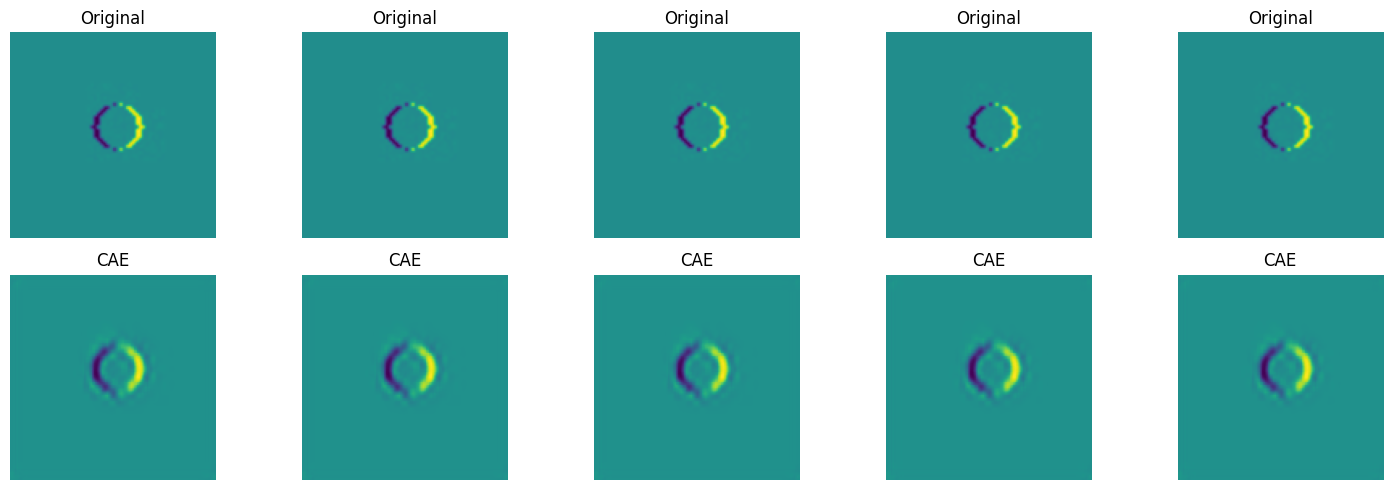

In [40]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Define the directory containing the simulation videos
videos_directory = 'CFD_VIDEOS'

# List all video files in the directory
video_files = [f'sim_{i}.mp4' for i in range(50)]  # Adjust according to the number of videos you have

def extract_features(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Couldn't open video file {video_path}")
        return None
    
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (128, 128))  # Resize frame to 128x128 pixels
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert frame to grayscale
        frames.append(frame)
    
    cap.release()
    
    if not frames:
        print(f"Error: Couldn't read frames from video file {video_path}")
        return None
    
    return np.array(frames)

# Extract features from each video and concatenate into a single array
video_data = [extract_features(os.path.join(videos_directory, video_path)) for video_path in video_files]
X_train = np.concatenate(video_data, axis=0)

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0

# Reshape data for CAE input
X_train_cae = X_train.reshape((X_train.shape[0], 128, 128, 1))

# Define CAE architecture for grayscale images
input_img = Input(shape=(128, 128, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the CAE with early stopping
history = autoencoder.fit(X_train_cae, X_train_cae, epochs=10, batch_size=32, shuffle=True, validation_split=0.2, callbacks=[early_stopping])

# Evaluate reconstruction accuracy (optional)
X_train_cae_reconstructed = autoencoder.predict(X_train_cae)
cae_accuracy = np.mean(np.abs(X_train_cae - X_train_cae_reconstructed))
print(f"CAE Reconstruction Accuracy: {cae_accuracy}")

# Display original and reconstructed images
plt.figure(figsize=(15, 5))
for i in range(5):
    # Original Image
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(128, 128))
    plt.title('Original')
    plt.axis('off')

    # CAE-Reconstructed Image
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_train_cae_reconstructed[i].reshape(128, 128))
    plt.title('CAE')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
import random
import os
import cv2
import numpy as np

def run_and_save_simulation(px, py, R, Hp, b, num_iterations, sim):
    SW = shallow(N=64, px=px, py=py, R=R, Hp=Hp, b=b)
    
    # Video settings
    video_filename = f"CFD_VIDEOS/sim_{sim}.mp4"
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify MP4 codec
    fps = 10  # Frames per second
    frame_size = (64, 64)
    out = cv2.VideoWriter(video_filename, fourcc, fps, frame_size, isColor=True)  # Ensure isColor=True for RGB
    
    for i in range(num_iterations):
        SW.evolve()
        if i % 20 == 0:
            u_frame = SW.u  # Get the u dimension
            u_normalized = cv2.normalize(u_frame, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
            u_resized = cv2.resize(u_normalized, frame_size)
            
            # Convert single channel to 3-channel RGB
            u_resized_rgb = cv2.cvtColor(u_resized, cv2.COLOR_GRAY2RGB)
            
            out.write(u_resized_rgb)  # Write the RGB frame
    
    out.release()
    print(f"Video saved as {video_filename}")
    
    # Return the parameters as a list
    return [px, py, R, Hp, b]

num_simulations = 100
iteration_times = 1000
sim = 0
os.makedirs('CFD_VIDEOS', exist_ok=True)  # Ensure the directory exists

parameters_list = []

# Generate and save simulations and their parameters
for _ in range(num_simulations):
    px = random.randint(27, 37) * 1.0
    py = random.randint(27, 37) * 1.0
    R = random.randint(40, 80) * 1.0
    Hp = random.randint(5, 20) * 0.01
    b = random.randint(1, 100) * 0.1

    params = run_and_save_simulation(px, py, R, Hp, b, iteration_times, sim)
    parameters_list.append(params)  # Append the parameters to the list
    sim += 1

# Save the parameters list as a NumPy array
parameters_array = np.array(parameters_list)
np.save('CFD_VIDEOS/parameters_list.npy', parameters_array)
print("Parameters list saved as CFD_VIDEOS/parameters_list.npy")


Video saved as CFD_VIDEOS/sim_0.mp4
Video saved as CFD_VIDEOS/sim_1.mp4
Video saved as CFD_VIDEOS/sim_2.mp4
Video saved as CFD_VIDEOS/sim_3.mp4
Video saved as CFD_VIDEOS/sim_4.mp4
Video saved as CFD_VIDEOS/sim_5.mp4
Video saved as CFD_VIDEOS/sim_6.mp4
Video saved as CFD_VIDEOS/sim_7.mp4
Video saved as CFD_VIDEOS/sim_8.mp4
Video saved as CFD_VIDEOS/sim_9.mp4
Video saved as CFD_VIDEOS/sim_10.mp4
Video saved as CFD_VIDEOS/sim_11.mp4
Video saved as CFD_VIDEOS/sim_12.mp4
Video saved as CFD_VIDEOS/sim_13.mp4
Video saved as CFD_VIDEOS/sim_14.mp4
Video saved as CFD_VIDEOS/sim_15.mp4
Video saved as CFD_VIDEOS/sim_16.mp4
Video saved as CFD_VIDEOS/sim_17.mp4
Video saved as CFD_VIDEOS/sim_18.mp4
Video saved as CFD_VIDEOS/sim_19.mp4
Video saved as CFD_VIDEOS/sim_20.mp4
Video saved as CFD_VIDEOS/sim_21.mp4
Video saved as CFD_VIDEOS/sim_22.mp4
Video saved as CFD_VIDEOS/sim_23.mp4
Video saved as CFD_VIDEOS/sim_24.mp4
Video saved as CFD_VIDEOS/sim_25.mp4
Video saved as CFD_VIDEOS/sim_26.mp4
Video saved

Epoch 1/10
63/63 [==============================] - 162s 2s/step - loss: 0.6876 - val_loss: 0.6844
Epoch 2/10
63/63 [==============================] - 147s 2s/step - loss: 0.6831 - val_loss: 0.6823
Epoch 3/10
63/63 [==============================] - 147s 2s/step - loss: 0.6822 - val_loss: 0.6818
Epoch 4/10
63/63 [==============================] - 161s 3s/step - loss: 0.6819 - val_loss: 0.6817
Epoch 5/10
63/63 [==============================] - 146s 2s/step - loss: 0.6817 - val_loss: 0.6815
Epoch 6/10
63/63 [==============================] - 148s 2s/step - loss: 0.6816 - val_loss: 0.6815
Epoch 7/10
63/63 [==============================] - 148s 2s/step - loss: 0.6816 - val_loss: 0.6815
Epoch 8/10
63/63 [==============================] - 159s 3s/step - loss: 0.6815 - val_loss: 0.6814
Epoch 9/10
63/63 [==============================] - 149s 2s/step - loss: 0.6815 - val_loss: 0.6814
Epoch 10/10
79/79 [==============================] - 15s 184ms/step
CAE Reconstruction Accuracy: 0.0043667806

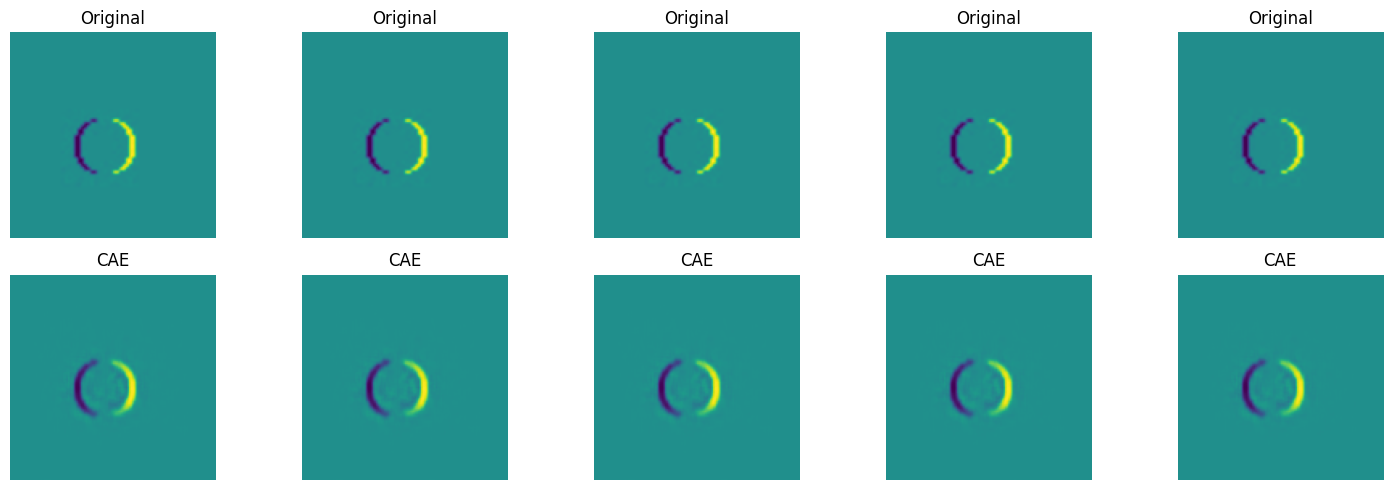

In [12]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define the directory containing the simulation videos
videos_directory = 'CFD_VIDEOS'

# List all video files in the directory
video_files = [f'sim_{i}.mp4' for i in range(50)]  # Adjust according to the number of videos you have

def extract_features(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Couldn't open video file {video_path}")
        return None
    
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (128, 128))  # Resize frame to 128x128 pixels
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert frame to grayscale
        frames.append(frame)
    
    cap.release()
    
    if not frames:
        print(f"Error: Couldn't read frames from video file {video_path}")
        return None
    
    return np.array(frames)

# Extract features from each video and concatenate into a single array
video_data = [extract_features(os.path.join(videos_directory, video_path)) for video_path in video_files]
X_train = np.concatenate([vd for vd in video_data if vd is not None], axis=0)

#include MLP layer

# Load the parameters list
parameters_array = np.load('CFD_VIDEOS/parameters_list.npy')
# Normalize parameters if necessary
parameters_list = (parameters_array - np.mean(parameters_array, axis=0)) / np.std(parameters_array, axis=0)

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0

# Reshape data for CAE input
X_train_cae = X_train.reshape((X_train.shape[0], 128, 128, 1))

# Ensure we have the same number of parameter vectors as we do frames
parameters_list_expanded = np.repeat(parameters_list, X_train.shape[0] // len(parameters_list), axis=0)

# Define CAE architecture with parameter input
input_img = Input(shape=(128, 128, 1))
input_params = Input(shape=(parameters_list.shape[1],))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Flatten and concatenate the encoded image and parameters
encoded_flat = Flatten()(encoded)
combined = Concatenate()([encoded_flat, input_params])

x = Dense(np.prod(encoded.shape[1:]), activation='relu')(combined)
x = Reshape(encoded.shape[1:])(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model([input_img, input_params], decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the CAE with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = autoencoder.fit([X_train_cae, parameters_list_expanded], X_train_cae, epochs=10, batch_size=32, shuffle=True, validation_split=0.2, callbacks=[early_stopping])

# Evaluate reconstruction accuracy
X_train_cae_reconstructed = autoencoder.predict([X_train_cae, parameters_list_expanded])
cae_accuracy = np.mean(np.abs(X_train_cae - X_train_cae_reconstructed))
print(f"CAE Reconstruction Accuracy: {cae_accuracy}")

# Display original and reconstructed images
plt.figure(figsize=(15, 5))
for i in range(5):
    # Original Image
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(128, 128))
    plt.title('Original')
    plt.axis('off')

    # CAE-Reconstructed Image
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_train_cae_reconstructed[i].reshape(128, 128))
    plt.title('CAE')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [37]:
encoder = Model(inputs=autoencoder.input[0], outputs=encoded)
latent_output_CAE = encoder.predict(X_train_cae)
print("Latent output shape:", latent_output_CAE.shape)  # Should be (total_frames, latent_dim)
# Assuming latent_output_CAE is (2500, 32, 32, 16)
latent_output_CAE_flattened = latent_output_CAE.reshape((latent_output_CAE.shape[0], -1))
print("Flattened latent output shape:", latent_output_CAE_flattened.shape)  # Should be (2500, 32*32*16)
# Number of frames per video (adjust based on your dataset)
frames_per_video = latent_output_CAE_flattened.shape[0] // 50
sequence_length = 50
latent_dim = latent_output_CAE_flattened.shape[1]

input_seq = np.zeros((1, sequence_length, latent_dim))

for i in range(50):  # Assuming there are 50 videos
    current_traj = latent_output_CAE_flattened[i * frames_per_video: (i + 1) * frames_per_video, :]
    for start in range(frames_per_video - sequence_length + 1):
        input_seq = np.concatenate((input_seq, current_traj[start:start + sequence_length, :].reshape(1, sequence_length, latent_dim)), axis=0)

# Remove the initial placeholder row
input_seq = input_seq[1:, :, :]

print("Input sequence shape:", input_seq.shape)  # Should be (num_sequences, sequence_length, latent_dim)

# Ensure input_seq has the correct data type
input_seq = input_seq.astype('float32')

# Generate a fake output for parameter identification
num_sequences = input_seq.shape[0]
train_parameter = np.random.rand(num_sequences, 5)  # Adjust the size accordingly

# Confirm shapes
print("Input sequence shape:", input_seq.shape)
print("Train parameter shape:", train_parameter.shape)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Latent output shape: (2500, 32, 32, 16)
Flattened latent output shape: (2500, 16384)
Input sequence shape: (50, 50, 16384)
Input sequence shape: (50, 50, 16384)
Train parameter shape: (50, 5)


In [40]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU
import numpy as np

input_dim = 16384
sequence_length = 50
output_dim = 5
hidden_size = 100

model = Sequential()
model.add(LSTM(hidden_size, input_shape=(sequence_length, input_dim), activation='relu'))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(output_dim))
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

# Train the LSTM model
history = model.fit(input_seq, train_parameter, validation_split=0.05, epochs=10, batch_size=64, verbose=2)

model.summary()

Epoch 1/10
1/1 - 1s - 929ms/step - loss: 0.3597 - mse: 0.3597 - val_loss: 0.2980 - val_mse: 0.2980
Epoch 2/10
1/1 - 0s - 331ms/step - loss: 0.3052 - mse: 0.3052 - val_loss: 0.2625 - val_mse: 0.2625
Epoch 3/10
1/1 - 0s - 345ms/step - loss: 0.2703 - mse: 0.2703 - val_loss: 0.2320 - val_mse: 0.2320
Epoch 4/10
1/1 - 0s - 301ms/step - loss: 0.2407 - mse: 0.2407 - val_loss: 0.2020 - val_mse: 0.2020
Epoch 5/10
1/1 - 0s - 281ms/step - loss: 0.2116 - mse: 0.2116 - val_loss: 0.1744 - val_mse: 0.1744
Epoch 6/10
1/1 - 0s - 289ms/step - loss: 0.1845 - mse: 0.1845 - val_loss: 0.1480 - val_mse: 0.1480
Epoch 7/10
1/1 - 0s - 270ms/step - loss: 0.1587 - mse: 0.1587 - val_loss: 0.1247 - val_mse: 0.1247
Epoch 8/10
1/1 - 0s - 267ms/step - loss: 0.1358 - mse: 0.1358 - val_loss: 0.1068 - val_mse: 0.1068
Epoch 9/10
1/1 - 0s - 288ms/step - loss: 0.1173 - mse: 0.1173 - val_loss: 0.0954 - val_mse: 0.0954
Epoch 10/10
1/1 - 0s - 274ms/step - loss: 0.1045 - mse: 0.1045 - val_loss: 0.0916 - val_mse: 0.0916


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 100)            │     6,594,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,802,369 (75.54 MB)

 Trainable params: 6,600,789 (25.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,201,580 (50.36 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
(50, 5)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


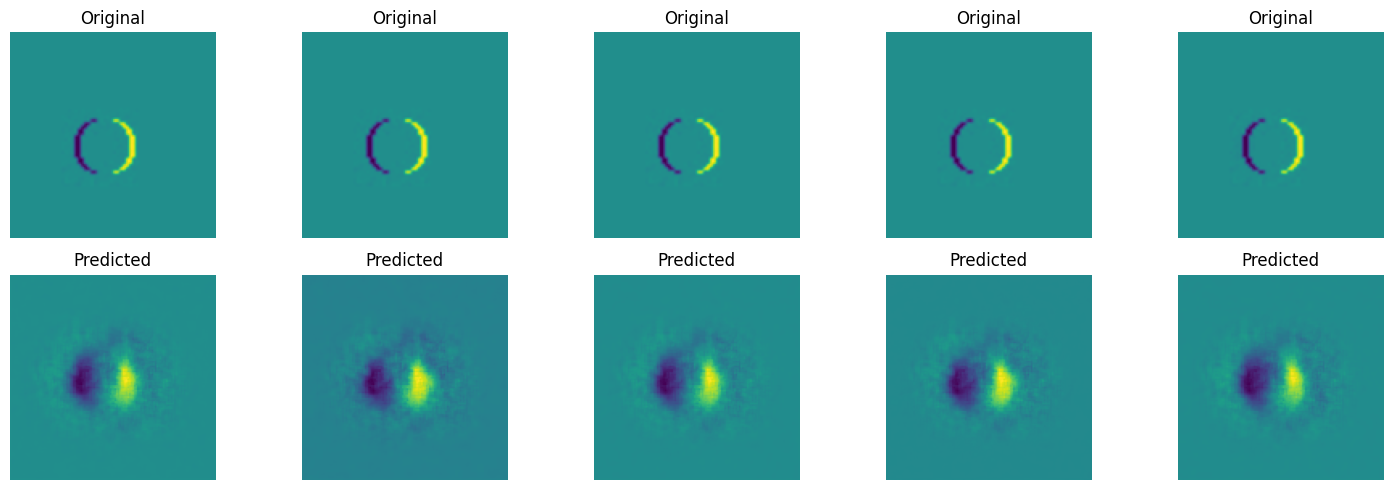

In [50]:
# Assuming `input_seq` contains the latent representations for prediction
predicted_parameters = model.predict(input_seq)

# Normalize predicted parameters if the CAE model expects normalized parameters
predicted_parameters_normalized = (predicted_parameters - np.mean(predicted_parameters, axis=0)) / np.std(predicted_parameters, axis=0)

print(predicted_parameters_normalized.shape)

# Use the predicted parameters for reconstruction with the CAE
X_train_cae_reconstructed_with_predicted_params = autoencoder.predict([X_train_cae[:50], predicted_parameters_normalized])

# Display original and reconstructed images with predicted parameters
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for i in range(5):
    # Original Image
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(128, 128))
    plt.title('Original')
    plt.axis('off')

    # CAE-Reconstructed Image with Predicted Parameters
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_train_cae_reconstructed_with_predicted_params[i].reshape(128, 128))
    plt.title('Predicted')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#include MLP layer in the autoencoder
#train for longer timestep
#apply encoder, flatten it as a vector and apply the lstm
#do the prediction inside the latent space of the autoencoder
#knn neural network